### Business case - Logistics

#### ABC is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

### Problem Statement

#### The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('logistics.txt')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.size

3476808

#### Here the Trip_uuid seems the unique factor between the trips they are doing. So we'll groupby trip_uuid, source_center and destination center.
#### The size of the data reduces to a great extent. i.e.26368 rows 

In [4]:
df_final= df.groupby(['trip_uuid','source_center','destination_center']).agg({"source_name":"last" , "destination_name":"last" , "od_start_time":"last" , "od_end_time":"last",
"trip_creation_time":"last" , "start_scan_to_end_scan":"last" , "route_type":"last" , "osrm_distance": "last" , "actual_time":"last" , "osrm_time":"last", 
"segment_osrm_distance": "sum" , "segment_actual_time": "sum" , "segment_osrm_time":"sum"})

In [5]:
df_final.head()

source_name  \
trip_uuid               source_center destination_center                                       
trip-153671041653548748 IND209304AAA  IND000000ACB        Kanpur_Central_H_6 (Uttar Pradesh)   
                        IND462022AAA  IND209304AAA        Bhopal_Trnsport_H (Madhya Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA         Doddablpur_ChikaDPP_D (Karnataka)   
                        IND572101AAA  IND561203AAB             Tumkur_Veersagr_I (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC             Gurgaon_Bilaspur_HB (Haryana)   

                                                                            destination_name  \
trip_uuid               source_center destination_center                                       
trip-153671041653548748 IND209304AAA  IND000000ACB             Gurgaon_Bilaspur_HB (Haryana)   
                        IND462022AAA  IND209304AAA        Kanpur_Central_H_6 (Uttar Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA         Chikblapur_ShntiSgr_D (Karnataka)   
                        IND572101AAA  IND561203AAB         Doddablpur_ChikaDPP_D (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC            Chandigarh_Mehmdpur_H (Punjab)   

                                                                       od_start_time  \
trip_uuid               source_center destination_center                               
trip-153671041653548748 IND209304AAA  IND000000ACB        2018-09-12 16:39:46.858469   
                        IND462022AAA  IND209304AAA        2018-09-12 00:00:16.535741   
trip-153671042288605164 IND561203AAB  IND562101AAA        2018-09-12 02:03:09.655591   
                        IND572101AAA  IND561203AAB        2018-09-12 00:00:22.886430   
trip-153671043369099517 IND000000ACB  IND160002AAC        2018-09-14 03:40:17.106733   

                                                                         od_end_time  \
trip_uuid               source_center destination_center                               
trip-153671041653548748 IND209304AAA  IND000000ACB        2018-09-13 13:40:23.123744   
                        IND462022AAA  IND209304AAA        2018-09-12 16:39:46.858469   
trip-153671042288605164 IND561203AAB  IND562101AAA        2018-09-12 03:01:59.598855   
                        IND572101AAA  IND561203AAB        2018-09-12 02:03:09.655591   
trip-153671043369099517 IND000000ACB  IND160002AAC        2018-09-14 17:34:55.442454   

                                                                  trip_creation_time  \
trip_uuid               source_center destination_center                               
trip-153671041653548748 IND209304AAA  IND000000ACB        2018-09-12 00:00:16.535741   
                        IND462022AAA  IND209304AAA        2018-09-12 00:00:16.535741   
trip-153671042288605164 IND561203AAB  IND562101AAA        2018-09-12 00:00:22.886430   
                        IND572101AAA  IND561203AAB        2018-09-12 00:00:22.886430   
trip-153671043369099517 IND000000ACB  IND160002AAC        2018-09-12 00:00:33.691250   

                                                          start_scan_to_end_scan  \
trip_uuid               source_center destination_center                           
trip-153671041653548748 IND209304AAA  IND000000ACB                        1260.0   
                        IND462022AAA  IND209304AAA                         999.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                          58.0   
                        IND572101AAA  IND561203AAB                         122.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                         834.0   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671

In [6]:
df_agg = df_final.groupby(['trip_uuid']).agg({'start_scan_to_end_scan':'sum','osrm_distance': 'sum','route_type':'last','actual_time':'sum','osrm_time':'sum','segment_osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum'})

In [7]:
df_merge = pd.merge(df_final, df_agg, how='inner', on = 'trip_uuid')
df_merge.head()

,source_name,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_x,route_type_x,osrm_distance_x,actual_time_x,osrm_time_x,...,segment_actual_time_x,segment_osrm_time_x,start_scan_to_end_scan_y,osrm_distance_y,route_type_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,1260.0,FTL,446.5496,732.0,329.0,...,728.0,534.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0
trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,999.0,FTL,544.8027,830.0,388.0,...,820.0,474.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0
trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,58.0,Carting,28.1994,47.0,26.0,...,46.0,26.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0
trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,122.0,Carting,56.9116,96.0,42.0,...,95.0,39.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0
trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,834.0,FTL,281.2109,611.0,212.0,...,608.0,231.0,3933.0,2354.0665,FTL,3347.0,1740.0,2545.2678,3308.0,1941.0


In [8]:
df_merge.reset_index()

,trip_uuid,source_name,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_x,route_type_x,osrm_distance_x,actual_time_x,...,segment_actual_time_x,segment_osrm_time_x,start_scan_to_end_scan_y,osrm_distance_y,route_type_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y
0,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,1260.0,FTL,446.5496,732.0,...,728.0,534.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0
1,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,999.0,FTL,544.8027,830.0,...,820.0,474.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0
2,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,58.0,Carting,28.1994,47.0,...,46.0,26.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,122.0,Carting,56.9116,96.0,...,95.0,39.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0
4,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,834.0,FTL,281.2109,611.0,...,608.0,231.0,3933.0,2354.0665,FTL,3347.0,1740.0,2545.2678,3308.0,1941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,2018-10-03 23:59:14.390954,62.0,Carting,42.5213,51.0,...,49.0,42.0,347.0,171.1103,Carting,264.0,179.0,223.5324,258.0,221.0
26364,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,2018-10-03 23:59:14.390954,91.0,Carting,40.6080,90.0,...,89.0,77.0,347.0,171.1103,Carting,264.0,179.0,223.5324,258.0,221.0
26365,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,2018-10-03 23:59:14.390954,44.0,Carting,16.0185,30.0,...,29.0,14.0,347.0,171.1103,Carting,264.0,179.0,223.5324,258.0,221.0
26366,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,2018-10-03 23:59:42.701692,287.0,FTL,52.5303,233.0,...,233.0,42.0,353.0,80.5787,FTL,275.0,68.0,80.5787,274.0,67.0


#### In here the source seems off, because it was not started at kanpur but from Bhopal, so we'll groupby again and merge.

In [9]:
df_mr= df_merge.groupby('trip_uuid').agg({'source_name':'last'})

In [10]:
df_merge1 = pd.merge(df_merge, df_mr, how='inner', on = 'trip_uuid')
df_merge1.head()

,source_name_x,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_x,route_type_x,osrm_distance_x,actual_time_x,osrm_time_x,...,segment_osrm_time_x,start_scan_to_end_scan_y,osrm_distance_y,route_type_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y,source_name_y
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,1260.0,FTL,446.5496,732.0,329.0,...,534.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0,Bhopal_Trnsport_H (Madhya Pradesh)
trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,999.0,FTL,544.8027,830.0,388.0,...,474.0,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0,Bhopal_Trnsport_H (Madhya Pradesh)
trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,58.0,Carting,28.1994,47.0,26.0,...,26.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0,Tumkur_Veersagr_I (Karnataka)
trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,122.0,Carting,56.9116,96.0,42.0,...,39.0,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0,Tumkur_Veersagr_I (Karnataka)
trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,834.0,FTL,281.2109,611.0,212.0,...,231.0,3933.0,2354.0665,FTL,3347.0,1740.0,2545.2678,3308.0,1941.0,Bangalore_Nelmngla_H (Karnataka)


#### Resetting the index as we have trip_uuid as index.

In [11]:
df_merge1 = df_merge1.reset_index()

#### we'll drop some of the columns that we don't need. ie. source_name_x,osrm_distance_x,start_scan_to_end_scan_x,route_type_x,actual_time_x,segment_osrm_time_x,osrm_time_x,segment_actual_time_x,segment_osrm_distance_x

In [12]:
df_merge1 = df_merge1.drop(['source_name_x','osrm_distance_x','start_scan_to_end_scan_x','route_type_x','actual_time_x','segment_osrm_time_x','osrm_time_x','segment_actual_time_x','segment_osrm_distance_x'],axis=1)

In [13]:
df_merge1.head()

,trip_uuid,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,osrm_distance_y,route_type_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y,source_name_y
0,trip-153671041653548748,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0,Bhopal_Trnsport_H (Madhya Pradesh)
1,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,2259.0,991.3523,FTL,1562.0,717.0,1320.4733,1548.0,1008.0,Bhopal_Trnsport_H (Madhya Pradesh)
2,trip-153671042288605164,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0,Tumkur_Veersagr_I (Karnataka)
3,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,180.0,85.1110,Carting,143.0,68.0,84.1894,141.0,65.0,Tumkur_Veersagr_I (Karnataka)
4,trip-153671043369099517,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,2354.0665,FTL,3347.0,1740.0,2545.2678,3308.0,1941.0,Bangalore_Nelmngla_H (Karnataka)


In [14]:
df_data = df_merge1[['trip_uuid','source_name_y','destination_name','od_start_time','od_end_time','trip_creation_time','start_scan_to_end_scan_y','route_type_y','osrm_distance_y','actual_time_y','osrm_time_y','segment_osrm_distance_y','segment_actual_time_y','segment_osrm_time_y']]
df_data

,trip_uuid,source_name_y,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0
1,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0
2,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,141.0,65.0
3,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,141.0,65.0
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,3308.0,1941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,2018-10-03 23:59:14.390954,347.0,Carting,171.1103,264.0,179.0,223.5324,258.0,221.0
26364,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,2018-10-03 23:59:14.390954,347.0,Carting,171.1103,264.0,179.0,223.5324,258.0,221.0
26365,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,2018-10-03 23:59:14.390954,347.0,Carting,171.1103,264.0,179.0,223.5324,258.0,221.0
26366,trip-153861118270144424,Hospet (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,2018-10-03 23:59:42.701692,353.0,FTL,80.5787,275.0,68.0,80.5787,274.0,67.0


#### Drop the duplicate rows with respect to trip_uuid. SO we'll keep the first record as it makes much sense.

In [15]:
df_data = df_data.drop_duplicates(subset=['trip_uuid'], keep="first")

In [16]:
df_data.head()

,trip_uuid,source_name_y,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0
2,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,141.0,65.0
4,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,3308.0,1941.0
6,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,15.0,19.8766,59.0,16.0
7,trip-153671052974046625,Hospet (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,117.0,146.7919,340.0,115.0


In [17]:
df_data.reset_index(inplace=True)

In [18]:
df_data.columns

Index(['index', 'trip_uuid', 'source_name_y', 'destination_name',
       'od_start_time', 'od_end_time', 'trip_creation_time',
       'start_scan_to_end_scan_y', 'route_type_y', 'osrm_distance_y',
       'actual_time_y', 'osrm_time_y', 'segment_osrm_distance_y',
       'segment_actual_time_y', 'segment_osrm_time_y'],
      dtype='object')

#### Drop the unwanted 'index' column

In [19]:
df_data.drop(['index'],axis=1,inplace=True)
df_data.head()

,trip_uuid,source_name_y,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0
1,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,141.0,65.0
2,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,3308.0,1941.0
3,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,15.0,19.8766,59.0,16.0
4,trip-153671052974046625,Hospet (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,117.0,146.7919,340.0,115.0


#### The final size of the dataset is 14777 rows

In [20]:
df_data.isnull().sum()

trip_uuid                    0
source_name_y               10
destination_name            31
od_start_time                0
od_end_time                  0
trip_creation_time           0
start_scan_to_end_scan_y     0
route_type_y                 0
osrm_distance_y              0
actual_time_y                0
osrm_time_y                  0
segment_osrm_distance_y      0
segment_actual_time_y        0
segment_osrm_time_y          0
dtype: int64

#### There is very small proportion of the values missing, so we'll drop them

In [21]:
df_data = df_data.dropna()

In [22]:
df_data.isnull().sum()

trip_uuid                   0
source_name_y               0
destination_name            0
od_start_time               0
od_end_time                 0
trip_creation_time          0
start_scan_to_end_scan_y    0
route_type_y                0
osrm_distance_y             0
actual_time_y               0
osrm_time_y                 0
segment_osrm_distance_y     0
segment_actual_time_y       0
segment_osrm_time_y         0
dtype: int64

### Feature Engineering

#### we'll create source state and destination state with the help of source_name_y and destination_name_y

In [23]:
df_data['origin_state'] = df_data['source_name_y'].apply(lambda x:x.split('(')[1][:-1])
df_data['destination_state']=df_data['destination_name'].apply(lambda x:x.split('(')[1][:-1])

In [24]:
df_data.head()

,trip_uuid,source_name_y,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,segment_actual_time_y,segment_osrm_time_y,origin_state,destination_state
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0,Madhya Pradesh,Haryana
1,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,141.0,65.0,Karnataka,Karnataka
2,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,3308.0,1941.0,Karnataka,Punjab
3,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,15.0,19.8766,59.0,16.0,Maharashtra,Maharashtra
4,trip-153671052974046625,Hospet (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,117.0,146.7919,340.0,115.0,Karnataka,Karnataka


#### Creating start month,date and year columns

In [25]:
df_data['start_date'] = df_data['od_start_time'].apply(lambda x:x.split(' ')[0])

In [26]:
df_data['start_date'] = pd.to_datetime(df_data['start_date'])

In [27]:
df_data['start_year']= df_data['start_date'].dt.year
df_data['Start_month'] = df_data['start_date'].dt.month
df_data['Start_day'] = df_data['start_date'].dt.day

#### Creating end_month,date and year columns

In [28]:
df_data['end_date'] = df_data['od_end_time'].apply(lambda x:x.split(' ')[0])
df_data['end_date'] = pd.to_datetime(df_data['end_date'])
df_data['end_year']= df_data['end_date'].dt.year
df_data['end_month'] = df_data['end_date'].dt.month
df_data['end_day'] = df_data['end_date'].dt.day

#### Creating start time and end time for calculating the time took for the trip

In [29]:
df_data['start_time'] = df_data['od_start_time'].apply(lambda x:x.split(' ')[1])
df_data['end_time'] = df_data['od_end_time'].apply(lambda x:x.split(' ')[1])

In [30]:
df_data['od_start_time'] = pd.to_datetime(df_data['od_start_time'])
df_data['od_end_time'] = pd.to_datetime(df_data['od_end_time'])

In [31]:
df_data['time_diff'] = (df_data['od_end_time'] - df_data['od_start_time']).dt.total_seconds() / 60

In [32]:
df_data.head()

,trip_uuid,source_name_y,destination_name,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,...,start_year,Start_month,Start_day,end_date,end_year,end_month,end_day,start_time,end_time,time_diff
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,...,2018,9,12,2018-09-13,2018,9,13,16:39:46.858469,13:40:23.123744,1260.604421
1,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,...,2018,9,12,2018-09-12,2018,9,12,02:03:09.655591,03:01:59.598855,58.832388
2,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,...,2018,9,14,2018-09-14,2018,9,14,03:40:17.106733,17:34:55.442454,834.638929
3,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,...,2018,9,12,2018-09-12,2018,9,12,00:01:00.113710,01:41:29.809822,100.494935
4,trip-153671052974046625,Hospet (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,...,2018,9,12,2018-09-12,2018,9,12,00:02:09.740725,02:34:10.515593,152.012914


#### Let's see the info() for the columns that are present in the dataframe

In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14777 entries, 0 to 14816
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   trip_uuid                 14777 non-null  object        
 1   source_name_y             14777 non-null  object        
 2   destination_name          14777 non-null  object        
 3   od_start_time             14777 non-null  datetime64[ns]
 4   od_end_time               14777 non-null  datetime64[ns]
 5   trip_creation_time        14777 non-null  object        
 6   start_scan_to_end_scan_y  14777 non-null  float64       
 7   route_type_y              14777 non-null  object        
 8   osrm_distance_y           14777 non-null  float64       
 9   actual_time_y             14777 non-null  float64       
 10  osrm_time_y               14777 non-null  float64       
 11  segment_osrm_distance_y   14777 non-null  float64       
 12  segment_actual_tim

#### Plots to understand the duistributions

#### We should see if start_scan_to_end_scan_y and time_diff are same or not.

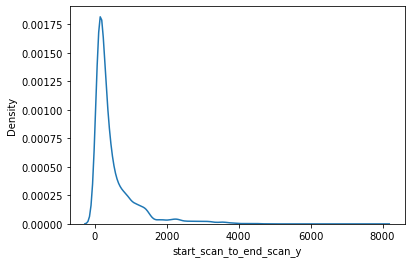

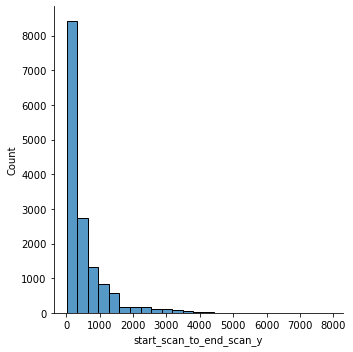

In [34]:
sns.kdeplot(x='start_scan_to_end_scan_y', data=df_data)
sns.displot(x='start_scan_to_end_scan_y',bins=25,data=df_data)
plt.show()

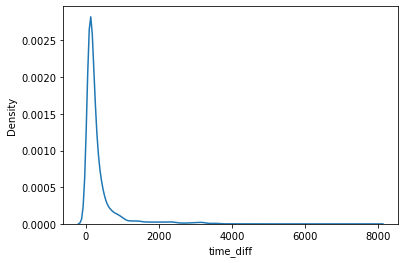

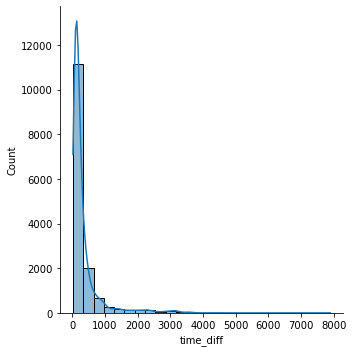

In [35]:
sns.kdeplot(x='time_diff',data=df_data)
sns.displot(x='time_diff',bins=25,kde = True, data=df_data)
plt.show()

#### Clearly, there's difference in the time_diff and start_scan_to_end_scan. These two are not same

### Analysis between actual_time aggregated value and OSRM time aggregated value 

#### Null Hypothesis - The distributions are same
#### Alternate Hypothesis - The distributions are different

In [36]:
act_time=df_data['actual_time_y']
osrm_time=df_data['osrm_time_y']

In [37]:
from scipy.stats import ks_2samp
test_stats,pvalue=ks_2samp(act_time, osrm_time)
print('Test_stats:', test_stats)
print('P_value:',pvalue)
if pvalue <0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Test_stats: 0.29796305068687823
P_value: 0.0
Reject the null hypothesis


#### since P-value is less than 0.05, So we reject null hypothesis. So there's some difference in the times

### Analysis between actual_time aggregated value and segment actual time aggregated value.
#### Null Hypothesis - The distributions are same
#### Alternate Hypothesis - The distributions are different

In [38]:
seg = df_data['segment_actual_time_y']

In [39]:
test_stats,pvalue=ks_2samp(act_time, seg)
print('Test_stats:', test_stats)
print('P_value:',pvalue)
if pvalue <0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Test_stats: 0.006361237057589508
P_value: 0.9241229250302239
Fail to reject the null hypothesis


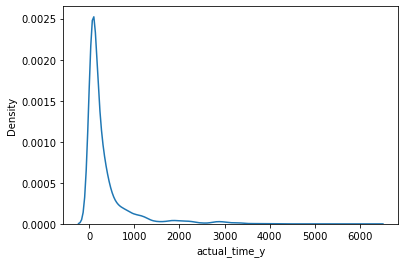

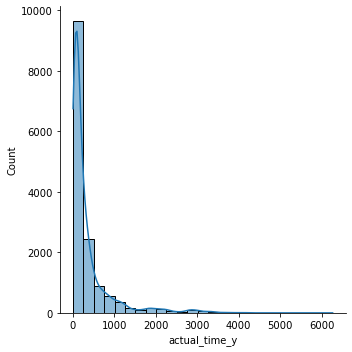

In [40]:
sns.kdeplot(x='actual_time_y', data=df_data)
sns.displot(x='actual_time_y',bins=25,kde = True, data=df_data)
plt.show()

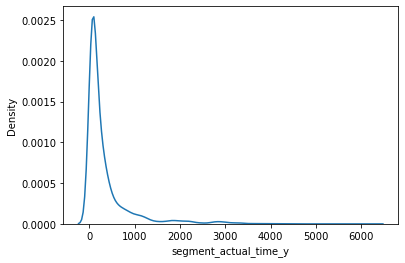

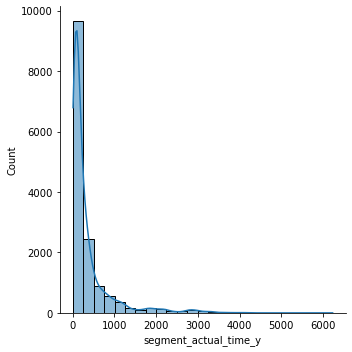

In [41]:
sns.kdeplot(x='segment_actual_time_y',data=df_data)
sns.displot(x='segment_actual_time_y',bins=25,kde = True, data=df_data)
plt.show()

#### The two samples are coming from same distribution
#### Hence there's no much difference in actual_time_y and segment_actual_time_y

### Analysis between osrm distance aggregated value and segment osrm distance aggregated value.
#### Null Hypothesis - The distributions are same
#### Alternate Hypothesis - The distributions are different

In [42]:
act_dis=df_data['osrm_distance_y']
seg_dis = df_data['segment_osrm_distance_y']

In [43]:
test_stats,pvalue =ks_2samp(act_dis, seg_dis)
print('Test_stats:', test_stats)
print('P_value:',pvalue)
if pvalue <0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Test_stats: 0.0416864045476078
P_value: 1.3600724418944635e-11
Reject the null hypothesis


#### Here the P-value is less than 0.05 so we reject the null hypothesis.
#### Hence these two are different distributions

### Analysis between osrm time aggregated value and segment osrm time aggregated value
#### Null Hypothesis - The distributions are same
#### Alternate Hypothesis - The distributions are different

In [44]:
act_tim=df_data['osrm_time_y']
seg_tim = df_data['segment_osrm_time_y']

In [45]:
test_stats,pvalue= ks_2samp(act_tim, seg_tim)
print('Test_stats:', test_stats)
print('P_value:',pvalue)
if pvalue <0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Test_stats: 0.03640793124450159
P_value: 6.05452393104822e-09
Reject the null hypothesis


#### We'll drop some extra columns that are not needed further

In [46]:
df_data.drop(['source_name_y','destination_name','start_date','end_date'],axis=1,inplace=True)

In [47]:
df_data.head()

,trip_uuid,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,...,destination_state,start_year,Start_month,Start_day,end_year,end_month,end_day,start_time,end_time,time_diff
0,trip-153671041653548748,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,...,Haryana,2018,9,12,2018,9,13,16:39:46.858469,13:40:23.123744,1260.604421
1,trip-153671042288605164,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,...,Karnataka,2018,9,12,2018,9,12,02:03:09.655591,03:01:59.598855,58.832388
2,trip-153671043369099517,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,...,Punjab,2018,9,14,2018,9,14,03:40:17.106733,17:34:55.442454,834.638929
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,15.0,19.8766,...,Maharashtra,2018,9,12,2018,9,12,00:01:00.113710,01:41:29.809822,100.494935
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,117.0,146.7919,...,Karnataka,2018,9,12,2018,9,12,00:02:09.740725,02:34:10.515593,152.012914


#### The top-5 Destination states are:

In [48]:
df_data['destination_state'].value_counts()[0:6]

Maharashtra      2569
Karnataka        2259
Haryana          1526
Tamil Nadu       1045
Uttar Pradesh     820
Telangana         810
Name: destination_state, dtype: int64

#### The top-5 origin states are:

In [49]:
df_data['origin_state'].value_counts()[0:6]

Maharashtra      2654
Karnataka        2266
Haryana          1521
Tamil Nadu       1092
Uttar Pradesh     787
Gujarat           757
Name: origin_state, dtype: int64

In [50]:
df_data['trip_creation_time'] = pd.to_datetime(df_data['trip_creation_time'])

In [51]:
df_data['trip_time_diff'] = (df_data['od_start_time'] - df_data['trip_creation_time']).dt.total_seconds() / 60

In [52]:
df_data.head()

,trip_uuid,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,...,start_year,Start_month,Start_day,end_year,end_month,end_day,start_time,end_time,time_diff,trip_time_diff
0,trip-153671041653548748,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,...,2018,9,12,2018,9,13,16:39:46.858469,13:40:23.123744,1260.604421,999.505379
1,trip-153671042288605164,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,...,2018,9,12,2018,9,12,02:03:09.655591,03:01:59.598855,58.832388,122.779486
2,trip-153671043369099517,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,...,2018,9,14,2018,9,14,03:40:17.106733,17:34:55.442454,834.638929,3099.723591
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 00:01:00.113710,100.0,Carting,19.6800,59.0,15.0,19.8766,...,2018,9,12,2018,9,12,00:01:00.113710,01:41:29.809822,100.494935,0.000000
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,2018-09-12 00:02:09.740725,717.0,FTL,146.7918,341.0,117.0,146.7919,...,2018,9,12,2018,9,12,00:02:09.740725,02:34:10.515593,152.012914,0.000000


In [53]:
df_data[df_data['trip_time_diff']!=0]

,trip_uuid,od_start_time,od_end_time,trip_creation_time,start_scan_to_end_scan_y,route_type_y,osrm_distance_y,actual_time_y,osrm_time_y,segment_osrm_distance_y,...,start_year,Start_month,Start_day,end_year,end_month,end_day,start_time,end_time,time_diff,trip_time_diff
0,trip-153671041653548748,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2259.0,FTL,991.3523,1562.0,717.0,1320.4733,...,2018,9,12,2018,9,13,16:39:46.858469,13:40:23.123744,1260.604421,999.505379
1,trip-153671042288605164,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,180.0,Carting,85.1110,143.0,68.0,84.1894,...,2018,9,12,2018,9,12,02:03:09.655591,03:01:59.598855,58.832388,122.779486
2,trip-153671043369099517,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,3933.0,FTL,2354.0665,3347.0,1740.0,2545.2678,...,2018,9,14,2018,9,14,03:40:17.106733,17:34:55.442454,834.638929,3099.723591
5,trip-153671055416136166,2018-09-12 02:12:10.755603,2018-09-12 03:13:03.432532,2018-09-12 00:02:34.161600,189.0,Carting,28.0647,61.0,23.0,28.0647,...,2018,9,12,2018,9,12,02:12:10.755603,03:13:03.432532,60.877949,129.609900
8,trip-153671074033284934,2018-09-12 02:31:39.246238,2018-09-12 05:16:28.581141,2018-09-12 00:05:40.333071,280.0,Carting,30.9359,161.0,29.0,30.9358,...,2018,9,12,2018,9,12,02:31:39.246238,05:16:28.581141,164.822248,145.981886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14805,trip-153861073259859847,2018-10-04 02:01:13.743832,2018-10-04 03:40:04.649307,2018-10-03 23:52:12.598866,98.0,Carting,11.6408,25.0,9.0,11.6408,...,2018,10,4,2018,10,4,02:01:13.743832,03:40:04.649307,98.848425,129.019083
14806,trip-153861075467184898,2018-10-04 02:08:07.124942,2018-10-04 03:58:31.862972,2018-10-03 23:52:34.672136,110.0,Carting,12.3633,34.0,10.0,12.3633,...,2018,10,4,2018,10,4,02:08:07.124942,03:58:31.862972,110.412301,135.540880
14810,trip-153861090163768194,2018-10-04 02:09:14.276831,2018-10-04 03:07:24.591271,2018-10-03 23:55:01.637939,58.0,Carting,15.8436,42.0,12.0,15.8436,...,2018,10,4,2018,10,4,02:09:14.276831,03:07:24.591271,58.171907,134.210648
14814,trip-153861106442901555,2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,2018-10-03 23:57:44.429324,421.0,Carting,58.9037,282.0,48.0,104.8866,...,2018,10,4,2018,10,4,02:51:27.075797,06:59:51.621332,248.409092,173.710775


#### There are 4518 trips where there's huge time difference between the trip started time and trip creation time.

In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14777 entries, 0 to 14816
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   trip_uuid                 14777 non-null  object        
 1   od_start_time             14777 non-null  datetime64[ns]
 2   od_end_time               14777 non-null  datetime64[ns]
 3   trip_creation_time        14777 non-null  datetime64[ns]
 4   start_scan_to_end_scan_y  14777 non-null  float64       
 5   route_type_y              14777 non-null  object        
 6   osrm_distance_y           14777 non-null  float64       
 7   actual_time_y             14777 non-null  float64       
 8   osrm_time_y               14777 non-null  float64       
 9   segment_osrm_distance_y   14777 non-null  float64       
 10  segment_actual_time_y     14777 non-null  float64       
 11  segment_osrm_time_y       14777 non-null  float64       
 12  origin_state      

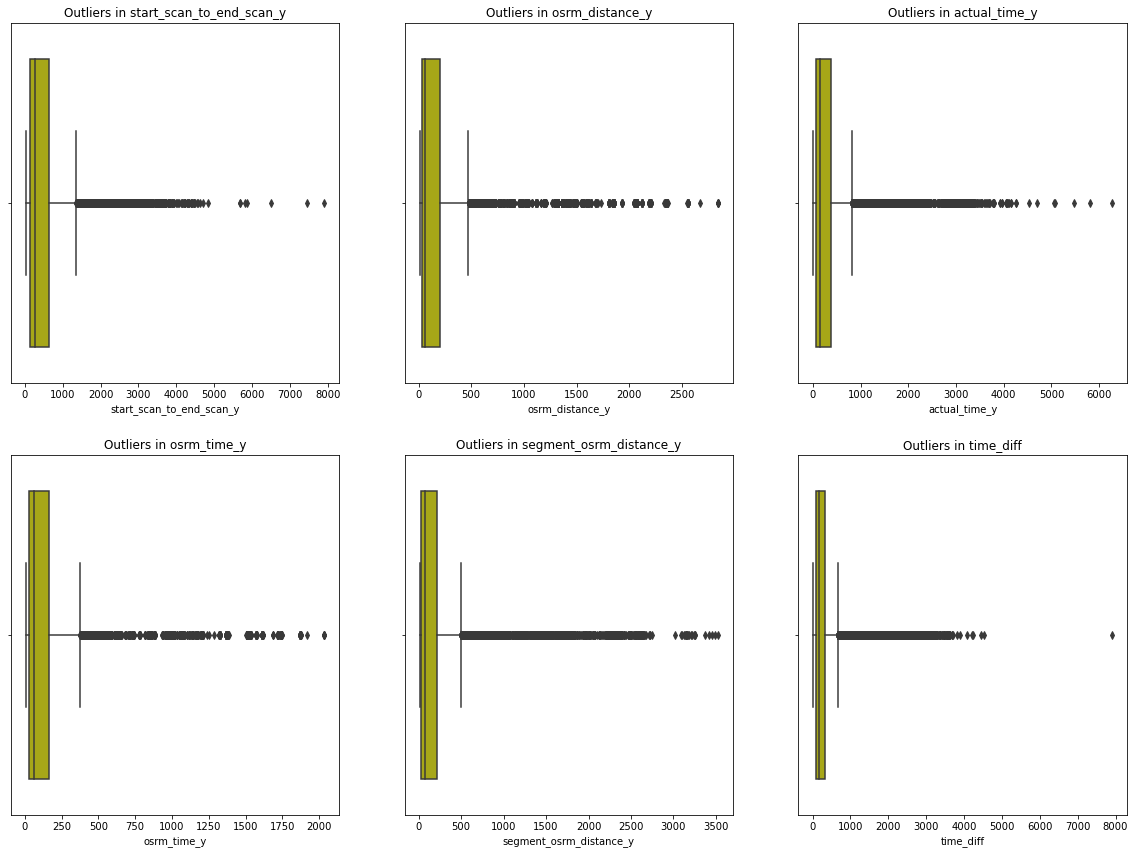

In [55]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
fig.subplots_adjust(top=1.5)


sns.boxplot(x='start_scan_to_end_scan_y',data = df_data,ax=axis[0,0],color='y').set_title('Outliers in start_scan_to_end_scan_y')
sns.boxplot(x='osrm_distance_y',data = df_data,ax=axis[0,1],color='y').set_title('Outliers in osrm_distance_y')
sns.boxplot(x='actual_time_y',data = df_data,ax=axis[0,2],color='y').set_title('Outliers in actual_time_y')
sns.boxplot(x='osrm_time_y',data = df_data,ax=axis[1,0],color='y').set_title('Outliers in osrm_time_y')
sns.boxplot(x='segment_osrm_distance_y',data = df_data,ax=axis[1,1],color='y').set_title('Outliers in segment_osrm_distance_y')
sns.boxplot(x='time_diff',data = df_data,ax=axis[1,2],color='y').set_title('Outliers in time_diff')
plt.show()  

In [56]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [57]:
print(ohe)

OneHotEncoder()


In [58]:
new_array = ohe.fit_transform(df_data[['route_type_y']]).toarray()

In [59]:
ohe.categories_

[array(['Carting', 'FTL'], dtype=object)]

In [60]:
new_labels = ohe.categories_

In [61]:
new_labels = np.array(new_labels).ravel()

In [62]:
pd.DataFrame(new_array,columns=new_labels)

,Carting,FTL
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
14772,1.0,0.0
14773,1.0,0.0
14774,1.0,0.0
14775,1.0,0.0


In [63]:
from sklearn.preprocessing import MinMaxScaler
data = df_data[['Start_month']]

In [64]:
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)

In [65]:
print(scaled_data)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


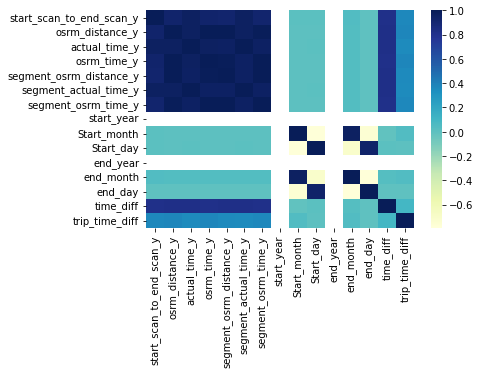

In [66]:
sns.heatmap(df_data.corr(),cmap='YlGnBu')
plt.show()

## Recommendations
#### 1. There's some differ3nce in trip_creation_time and od_start_time. Should be looking iinto that and if needed that can be reduced. Because there are around 4.5k trips out of 14.5k trips which there are significant time difference.
#### 2. There's difference in actual_time aggregated value and OSRM time aggregated value, have to find out what's going on there. If there's valid reason behind this trend we need to make some changes in the application so that it can show proper time.
#### 3. As same above there's difference in osrm distance aggregated value and segment osrm distance aggregated value. Same should be followed here too.